## Clustering

Using the dataset which contains weight and height data for the general population, separate the data into male and female using clustering based on the weights and heights recorded.

Import libraries and read in the file 'weight-height.csv'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Create a scatter plot of the weight and height data.

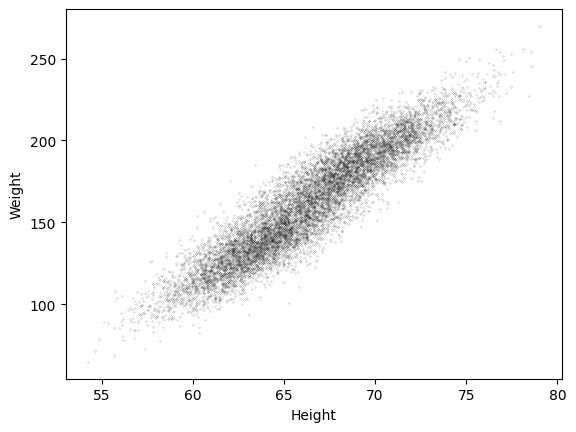

In [2]:
X = data[["Height","Weight","Gender"]]
#Visualise data points
plt.scatter(X["Height"],X["Weight"],c='black',s=0.01)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

Randomly select two points to form the centroids of our two clusters.  Plot these centroids on the scatter plot

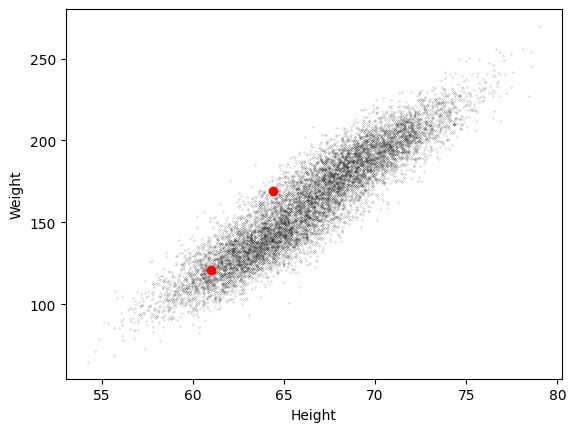

In [3]:
K=2

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["Height"],X["Weight"],c='black',s=0.01)
plt.scatter(Centroids["Height"],Centroids["Weight"],c='red')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

Calculate the distance between every point and the two centroids and save this data under a new column in the dataframe.

In [4]:
XD=X
i=1
for index1,row_c in Centroids.iterrows():
    ED=[]
    for index2,row_d in XD.iterrows():
        d1=(row_c["Height"]-row_d["Height"])**2
        d2=(row_c["Weight"]-row_d["Weight"])**2
        d=np.sqrt(d1+d2)
        ED.append(d)
    X[i]=ED
    i=i+1



C:\Users\natha\AppData\Local\Temp\ipykernel_19660\1687764559.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\natha\AppData\Local\Temp\ipykernel_19660\1687764559.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


Iterate through each point and assign it to a cluster, based on its proximity to the centroid.

In [5]:
C=[]
for index,row in X.iterrows():
    min_dist=row[1]
    pos=1
    for i in range(K):
        if row[i+1] < min_dist:
            min_dist = row[i+1]
            pos=i+1
    C.append(pos)
X["Cluster"]=C


C:\Users\natha\AppData\Local\Temp\ipykernel_19660\3149523255.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


Compute the means of the new clusters of points (these will identify the new centroids).

In [6]:
#Centroids_new = X.groupby(["Cluster"]).mean()[["Height","Weight"]]
Centroids_new = X[["Cluster", "Height", "Weight"]].groupby("Cluster").mean()

print(Centroids_new)


            Height      Weight
Cluster                       
1        68.456272  180.516221
2        62.520745  126.308025


Iterate the process until the means don't change

In [7]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Height"]-row_d["Height"])**2
            d2=(row_c["Weight"]-row_d["Weight"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1
    
    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X[["Cluster", "Height", "Weight"]].groupby("Cluster").mean()

    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Weight'] - Centroids['Weight']).sum() + (Centroids_new['Height'] - Centroids['Height']).sum()
        print(diff.sum())
    Centroids_new = X[["Cluster", "Height", "Weight"]].groupby("Cluster").mean()


C:\Users\natha\AppData\Local\Temp\ipykernel_19660\1695864498.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\natha\AppData\Local\Temp\ipykernel_19660\1695864498.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
C:\Users\natha\AppData\Local\Temp\ipykernel_19660\1695864498.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

0.0


C:\Users\natha\AppData\Local\Temp\ipykernel_19660\1695864498.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


Plot the original data as a scatter plot, label the axes, include the position of the centroids, and colour code the clusters (so all members of a cluster have the same colour, different to the other cluster).

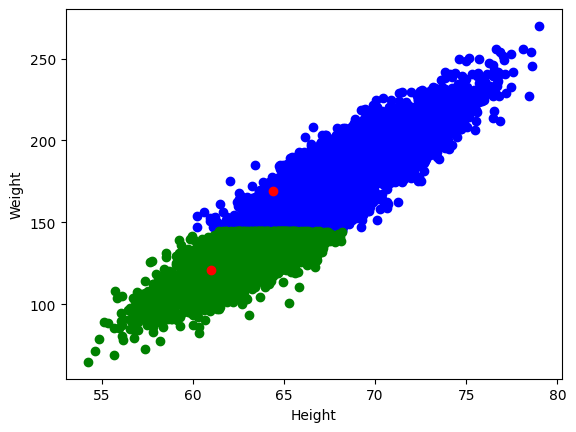

In [8]:

color=['blue','green']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Height"],data["Weight"],c=color[k])
plt.scatter(Centroids["Height"],Centroids["Weight"],c='red')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

Calculate the proportion of males and females in each cluster where the value for females is the proportion of the leftmost cluster made up of females, while the value for males is the proportion of the rightmost cluster made up of males

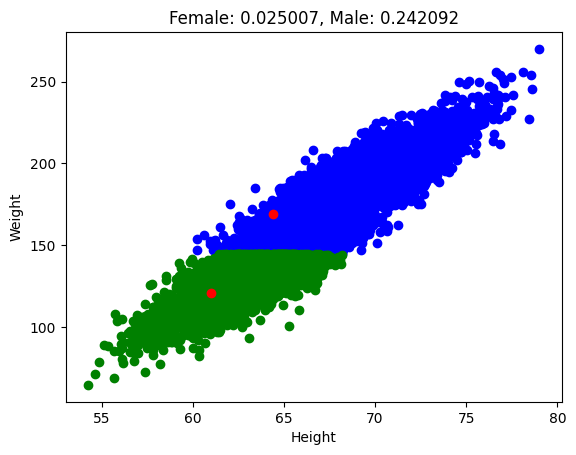

In [9]:
color=['blue','green']
labels = []
for k in range(K):
    labels.append(np.mean(data["Gender"]=='Male'))
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Height"],data["Weight"],c=color[k])
plt.scatter(Centroids["Height"],Centroids["Weight"],c='red')
plt.title('Female: {:2f}, Male: {:2f}'.format(labels[0],1-labels[1]))
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()
